---
---- Import Libraries ----

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
from matplotlib.style import use
import matplotlib

---
---- Connection with Drive ----

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


---
---- Load Dataset ----

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/WinnipegDataset.csv")
data.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


---
---- Split Data X and y ----

In [4]:
# input split
X = data.drop(columns=['label'], axis=1)
y = data['label']
print("X:\n",X.head())
print("\ny:\n",y.head())

# feature names
featureNames = X[:0]
print("\n",featureNames)

X:
        f1      f2       f3      f4      f5      f6      f7      f8       f9  \
0 -13.559 -21.407 -11.4040 -15.248 -11.923 -15.291 -2.1548 -7.8474 -10.0020   
1 -12.802 -20.335 -10.3990 -14.132 -11.096 -14.361 -2.4039 -7.5330  -9.9369   
2 -12.431 -19.902 -10.0740 -13.598 -10.829 -14.048 -2.3566 -7.4717  -9.8283   
3 -12.689 -19.529 -10.0280 -13.350 -11.056 -14.014 -2.6611 -6.8396  -9.5006   
4 -12.686 -19.278  -9.8185 -13.108 -10.932 -13.939 -2.8675 -6.5919  -9.4594   

       f10  ...     f165     f166    f167      f168     f169     f170  \
0  0.04239  ...  0.18519  0.72602  5.3333  6.000000  0.29489  9.77780   
1  0.22842  ...  0.33333 -0.48751  2.1111  0.098765  0.83333  0.33333   
2  0.44978  ...  0.25926  0.25298  2.2222  0.172840  0.68889  0.88889   
3  0.66378  ...  0.16049  0.43750  4.1111  0.320990  0.83333  0.33333   
4  0.83143  ...  0.18519  0.35000  4.0000  0.444440  0.68889  0.88889   

      f171     f172     f173     f174  
0  2.44440  1.67700  0.20988  0.65422  
1 

---
---- Control Data ----

In [5]:
data.isnull().sum()

label    0
f1       0
f2       0
f3       0
f4       0
        ..
f170     0
f171     0
f172     0
f173     0
f174     0
Length: 175, dtype: int64

---
---- Split Dataset Train and Test ----

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (260667, 174) (260667,)
Test:  (65167, 174) (65167,)


---
---- Feature Selection with ANOVA ----

In [37]:
# configure to select feature
featureSelection = SelectKBest(f_classif, k = 65).fit(X_train, y_train)

# transform train input data
X_train_fs = featureSelection.transform(X_train)

# transform test input data
X_test_fs = featureSelection.transform(X_test)

---
---- Selected Features ----

In [38]:
features = X_train.columns[featureSelection.get_support()]
print(features)

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f15', 'f25', 'f26', 'f27',
       'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f45', 'f46', 'f47', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f58', 'f62', 'f64',
       'f74', 'f75', 'f76', 'f79', 'f86', 'f87', 'f88', 'f89', 'f90', 'f92',
       'f94', 'f95', 'f98', 'f100', 'f101', 'f102', 'f103', 'f107', 'f109',
       'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f119', 'f121', 'f129',
       'f138', 'f140', 'f141', 'f156', 'f157', 'f159'],
      dtype='object')


---
---- Scores of all features ----

In [30]:
# # what are scores for the features
# for i in range(len(featureSelection.scores_)):
#  print('Feature %d: %f' % (i, featureSelection.scores_[i]))
# # plot the scores
# plt.bar([i for i in range(len(featureSelection.scores_))], featureSelection.scores_)
# plt.show()

---
---- Classification ----

In [39]:
# fit the model
model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train_fs,y_train)

LogisticRegression(solver='newton-cholesky')

________________________________________________
---- Prediction ----

In [40]:
# evaluate the model
y_pred = model.predict(X_test_fs)

________________________________________________
---- Confusion Matrix ----

In [41]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 7714     1    17    85     6    10     8]
 [    3   705     3     7     0     0     0]
 [    0     0 15169     7     4     4     3]
 [   30     0    28 14644    32    21     0]
 [   32     0    17    69  8766   429    15]
 [    5     2    16    40   277 16765     8]
 [    5     0     4     0     1     2   213]]


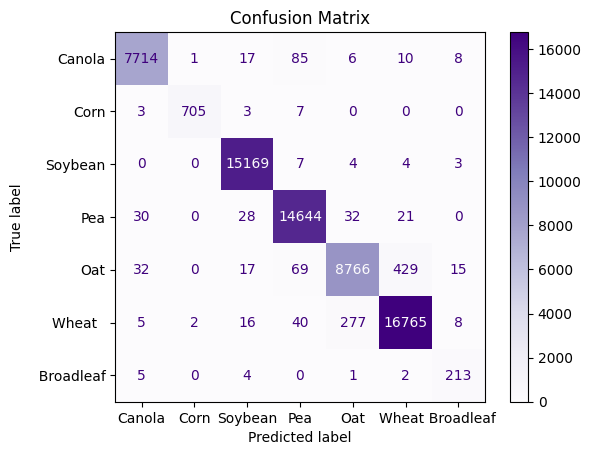

In [42]:
from ipywidgets.widgets.widget_media import text_type
classNames = ['Canola', 'Corn', 'Soybean','Pea','Oat','Wheat  ','  Broadleaf']
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = classNames)
cmDisplay.plot(cmap = 'Purples')

plt.title("Confusion Matrix")
plt.show()

---
---- Metrics ----

In [43]:
# for each class

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classNames, digits = 4))


Classification Report

              precision    recall  f1-score   support

      Canola     0.9904    0.9838    0.9871      7841
        Corn     0.9958    0.9819    0.9888       718
     Soybean     0.9944    0.9988    0.9966     15187
         Pea     0.9860    0.9925    0.9892     14755
         Oat     0.9648    0.9398    0.9521      9328
     Wheat       0.9730    0.9797    0.9763     17113
   Broadleaf     0.8623    0.9467    0.9025       225

    accuracy                         0.9817     65167
   macro avg     0.9667    0.9747    0.9704     65167
weighted avg     0.9817    0.9817    0.9817     65167



In [44]:
# overall

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

error_rate = 1 - accuracy
print('Error Rate: %.4f' % error_rate)

precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print('Precision: %.4f' % precision)

recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print('Recall: %.4f' % recall)

fScore = metrics.f1_score(y_test, y_pred, average = 'micro')
print('f score: %.4f' % fScore)

kappaScore = metrics.cohen_kappa_score(y_test, y_pred)
print('kappa score: %.4f' % kappaScore)

Accuracy: 0.9817
Error Rate: 0.0183
Precision: 0.9817
Recall: 0.9817
f score: 0.9817
kappa score: 0.9769


default func(f_classif)   
- Numerical Input, Categorical Output -
-LogisticRegression(solver='newton-cholesky')

*   0.9795 - 50 fetures
*   0.9815 - 60 features
*   0.9817 - 65 features
*   0.8811 - 80 features
                 
